# Root-CyNAPS reference simulation

Current file is a notebook presenting the procedure to run a reference simulations of the Root-CyNAPS model used for the following publication: 

    Tristan Gérault, Christophe Pradal, Romain Barillot, Céline Richard-Molard, Marion Gauthier, Alexandra Jullien, Frédéric Rees, 
    "Do specific root zones shape plant net N uptake? Modeling insights from Root-CyNAPS", submitted

# Importing packages

In [1]:
# Model packages
import openalea.rootcynaps
from openalea.rootcynaps.soon_public_packages.static_soil_assembly import StaticSoilAssembly
from openalea.rootcynaps import RootCyNAPS

# Utility packages
from openalea.fspm.utility.scenario import MakeScenarios as ms
from openalea.fspm.utility.writer import Logger
from openalea.fspm.utility.plot import analyze_data
from openalea.metafspm.scene_wrapper import play_Orchestra

# Importing a set of parameter to build a scenario

In [3]:

scenarios = ms.from_table(file_path="inputs/Scenarios_25_07_02.xlsx", which=["RC_ref_50"])

# Define custom scene parameters to place the root systems in the scene, and the nutrient solution concentration

Here we only introduce one plant

In [5]:
scene_xrange = 0.15
scene_yrange = 0.15
sowing_density = 1
target_nitrate_concentrations = [5e-1]    

# Running simulation (about 7 minutes)

Launching scene with 1 rows, 1 plant per rows, which represents 1 plants


WARNING, coordinates updating has been manually commented to use input MTGs
Launching Soil...   

   [RUNNING] 23 hours | step took 17.4 s Soil stopped

Simulation ended after 00:06:49 min without error   
Now proceeding to data writing on disk...   
Saving a final state xarray...   ...   
Successfully wrote data on disk after 0.1 minutes   
[LOGGER CLOSES]   Plant stopped


/home/torisuten/miniconda3/envs/wheat-bridges/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/home/torisuten/miniconda3/envs/wheat-bridges/lib/python3.10/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


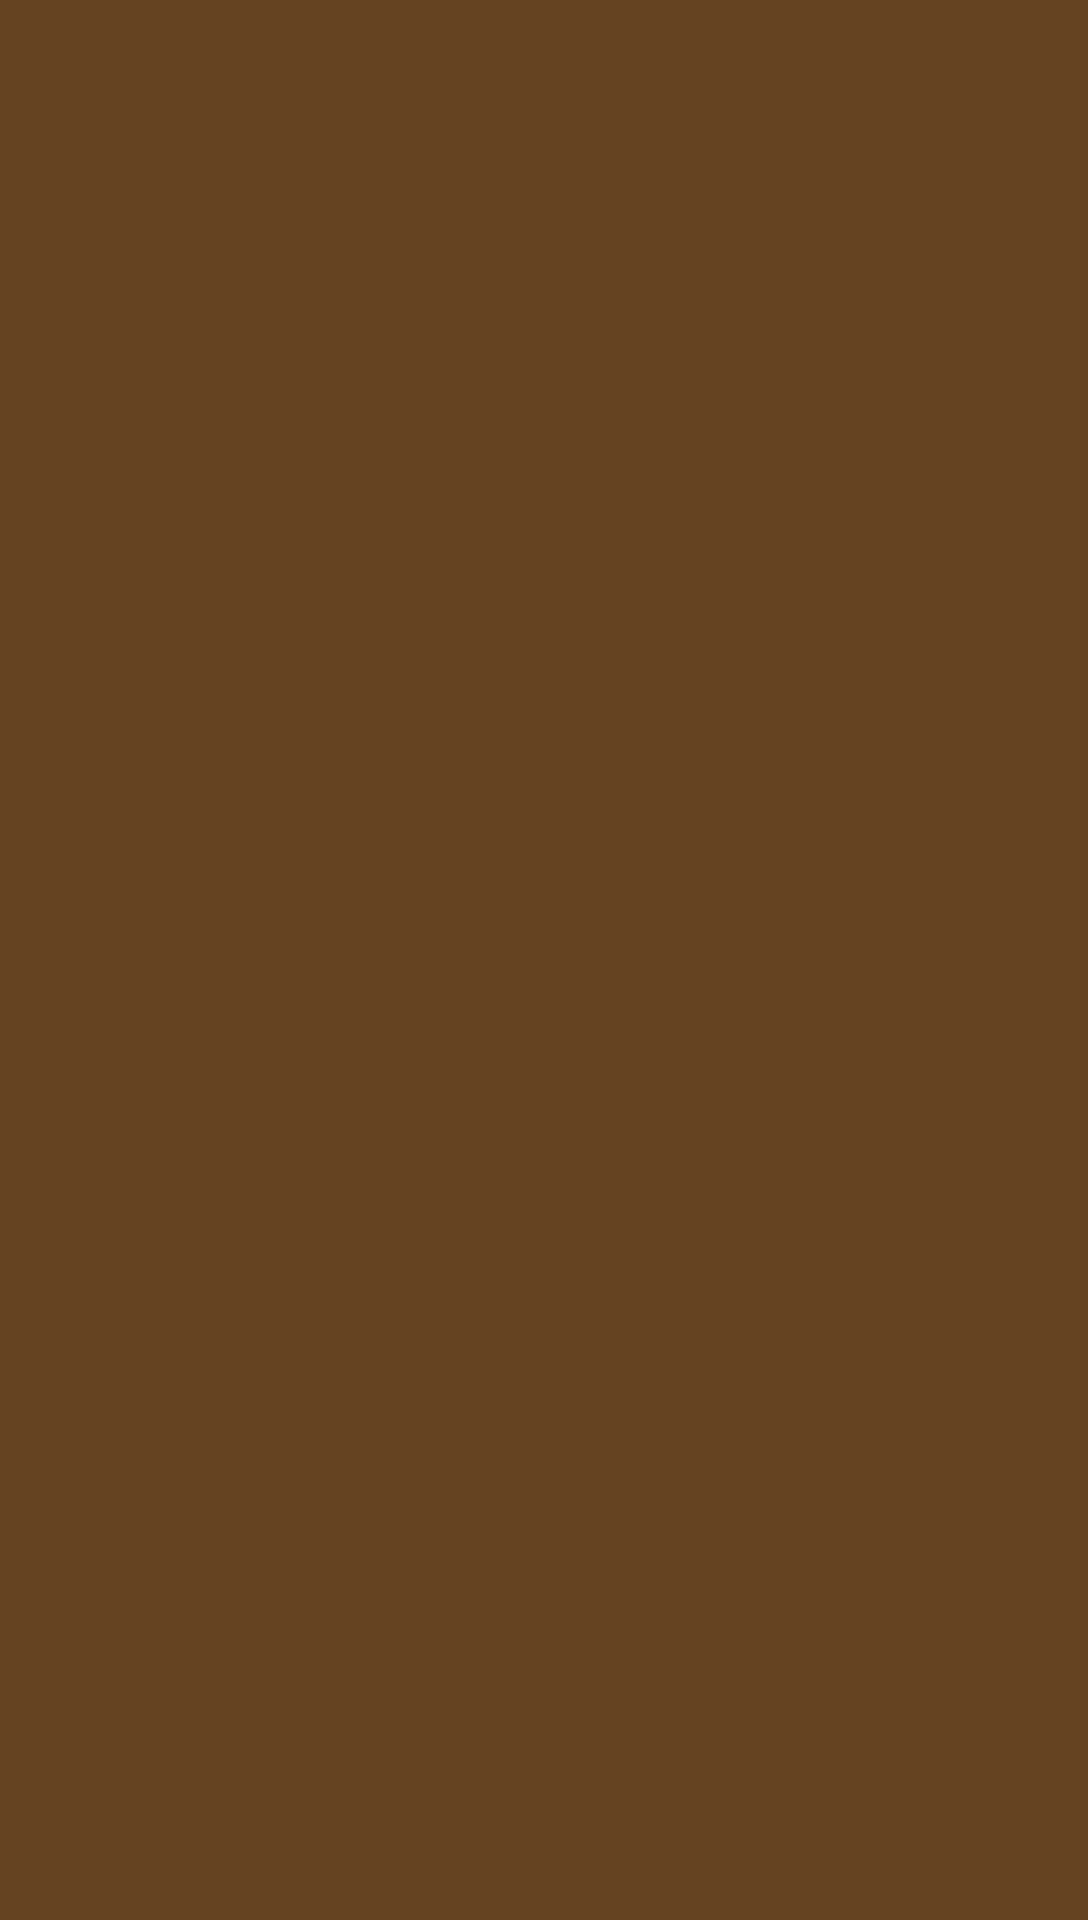

In [6]:
for scenario_name, scenario in scenarios.items():
    
    for concentration in target_nitrate_concentrations:
        scenario["parameters"]["root_cynaps"]["roots"]["dissolved_mineral_N"] = 5e-7 * concentration / 1e-1
        
        current_scenario_name = f"{str(scenario_name)}_{concentration:.2e}"
        play_Orchestra(scene_name=current_scenario_name, output_folder="outputs", plant_models=[RootCyNAPS], plant_scenarios=[scenario], 
                            soil_model=StaticSoilAssembly, soil_scenario=scenario,
                            translator_path=openalea.rootcynaps.__path__[0],
                            logger_class=Logger, log_settings=Logger.light_log,
                            scene_xrange=scene_xrange, scene_yrange=scene_yrange, sowing_density=sowing_density,
                            time_step=3600, n_iterations=24)

# Analyzing model outputs

In [6]:
analyze_data(scenarios=[current_scenario_name], outputs_dirpath="outputs", target_folder_key="RootCyNAPS_0",
                        inputs_dirpath="inputs",
                        on_sums=True,
                        on_performance=False,
                        animate_raw_logs=False,
                        target_properties=None # All properties are analyzed
                        )

[INFO] Starting data analysis
     [INFO] Producing 2D plots from summed and averaged properties


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/RC_ref_50_5.00e-01/RootCyNAPS_0 */MTG_properties/MTG_properties_summed/plant_scale_properties.csv'

# Manually browse and open resulting images and videos

Bellow is the example of nitrogen input flows in the root segment symplasm over the simulation time.

In [7]:
from IPython.display import Image
Image(filename='outputs/RootCyNAPS_0/MTG_properties/MTG_properties_summed/plots/AA.png')

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/RootCyNAPS_0/MTG_properties/MTG_properties_summed/plots/AA.png'

For 3D output visualization available at "outputs/RootCyNAPS_0/*.gltf", you can open them by drag and drop in <https://gltf-viewer.donmccurdy.com/>